In [2]:
import pandas as pd
import geopandas
%matplotlib inline

In [17]:
equipment = pd.read_csv("playground_Equipment.csv")
equipment[['_id', 'name', 'equipment_type', 'neighborhood']].head(10)

,_id,name,equipment_type,neighborhood
0,1,Able Long Playground,Play Area 2 to 5,Beechview
1,2,North Ave. Playground,Play Area 2 to 5,Allegheny Center
2,3,Vietnam Veteran's Playground,Slide,Squirrel Hill South
3,4,Schenley Overlook Playground,Swing 2 Bays,Squirrel Hill South
4,5,Schenley Overlook Playground,Slide,Squirrel Hill South
5,6,Chartiers Playground,Swing 2 Bays,Windgap
6,7,Chartiers Playground,Swing 2 Bays,Windgap
7,8,Chartiers Playground,Play Area 2 to 5,Windgap
8,9,Chartiers Playground,Play Area 5 to 12,Windgap
9,10,Chartiers Playground,Whirl,Windgap


+--------------------------------------------------------------------------------------------------+

Tells the __type__ of equipment in each neighborhood.

In [10]:
equipment_counts = equipment['neighborhood'].value_counts()

equipment_counts = equipment_counts.reset_index()
equipment_counts.columns = ['neighborhood', 'count']
print(equipment_counts.head(15))

           neighborhood  count
0   Squirrel Hill South     32
1          East Liberty     26
2             Beechview     21
3      Allegheny Center     15
4     South Side Slopes     14
5             Hazelwood     13
6              Sheraden     13
7               Elliott     11
8   Squirrel Hill North     10
9      Mount Washington     10
10        Highland Park     10
11          Beltzhoover     10
12        Lincoln Place      9
13             Garfield      9
14        South Oakland      9


+--------------------------------------+

Sums up all of the __equipment type__ into a count of the __total__.

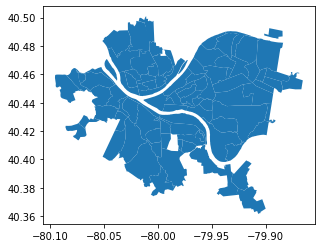

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [7]:
parks_map = neighborhoods.merge(equipment_counts, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
parks_map[['hood','count','geometry']].head()

,hood,count,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,8.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


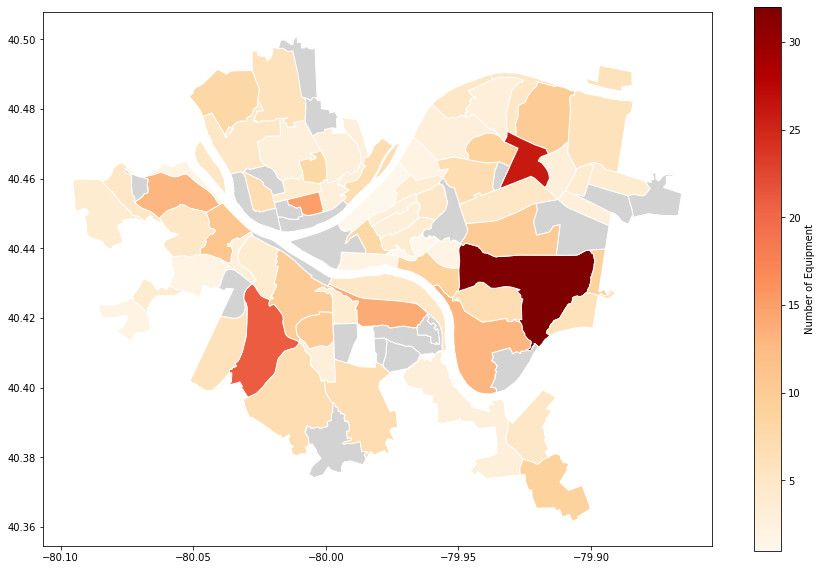

In [8]:
parks_map.plot(column='count', 
               cmap='OrRd', 
               edgecolor='white', 
               legend=True, 
               legend_kwds={'label': "Number of Equipment"}, 
               figsize=(15, 10), 
               missing_kwds={"color": "lightgrey"}
              )

Shows the amount of playground equipment per __neighborhood__, while marking the ones with none as __gray__.

In [16]:
sorted_parks_map = parks_map.sort_values(by='count', ascending=False)

# Select the top 5 neighborhoods
top_5_neighborhoods = sorted_parks_map.head(5)
top_5_neighborhoods_info = top_5_neighborhoods[['neighborhood', 'count']]
# Print or use the top 5 neighborhoods as needed
print(top_5_neighborhoods_info)

           neighborhood  count
24  Squirrel Hill South   32.0
77         East Liberty   26.0
40            Beechview   21.0
58     Allegheny Center   15.0
15    South Side Slopes   14.0


+----------------------------------------+

Picks the __top 5__ neighborhoods with the most __playground equipment__.